In [2]:
!pip install ipykernel jupyter
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pyyaml


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml

In [4]:
with open('/home/uzokmurod/Desktop/amaliyot/telco-churn/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

raw_data = config['data']['raw_data']
df = pd.read_csv(raw_data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

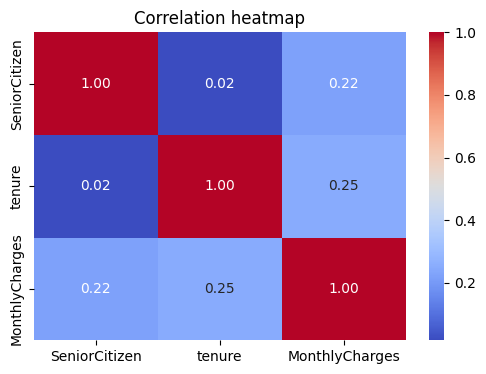

In [10]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(6,4))

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm" )
plt.title("Correlation heatmap")
plt.show()


In [11]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [12]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


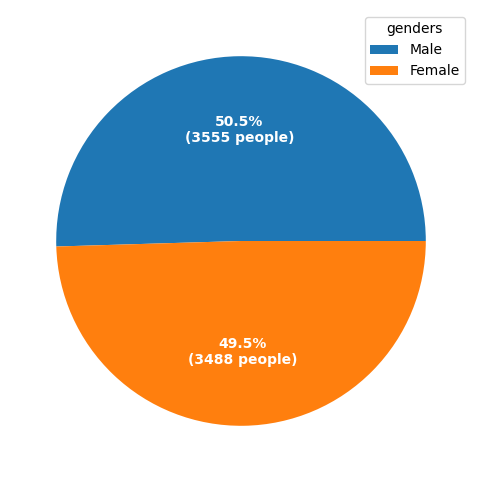

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))
data = df['gender'].value_counts()
def func(pct, all):
    absolute = int(np.round(pct/100.*np.sum(all)))
    return f"{pct:.1f}%\n({absolute:d} people)"

wedges, texts, autotexts = ax.pie(data.values, autopct=lambda pct:func(pct, data.values), textprops=dict(color="w"))

ax.legend(wedges, data.index, title='genders', loc=0)
plt.setp(autotexts, size=10, weight= 'bold')
plt.show()


In [21]:
l1 = [len(str(i).split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print(*l2)
df["TotalCharges"] = df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.drop(columns='customerID', inplace=True, axis=1)

488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
num_col = df.select_dtypes(include="number").columns.to_list()
obj_cols = df.select_dtypes(include= ['object']).columns.tolist()


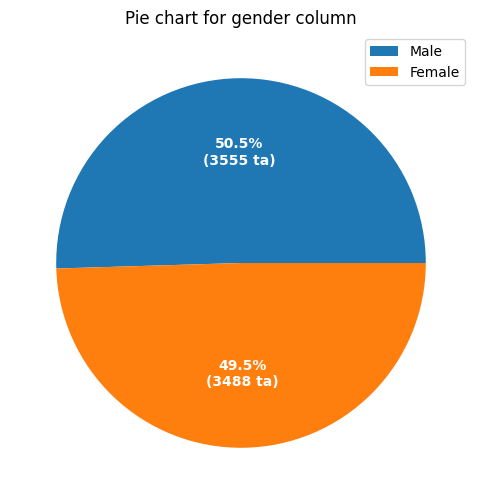

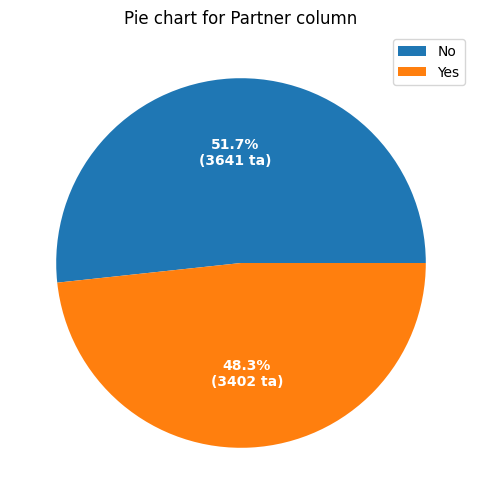

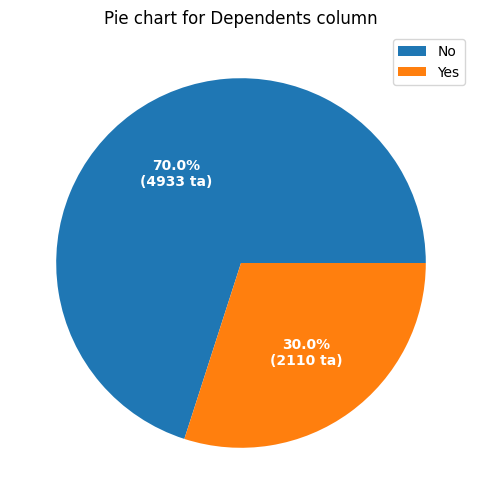

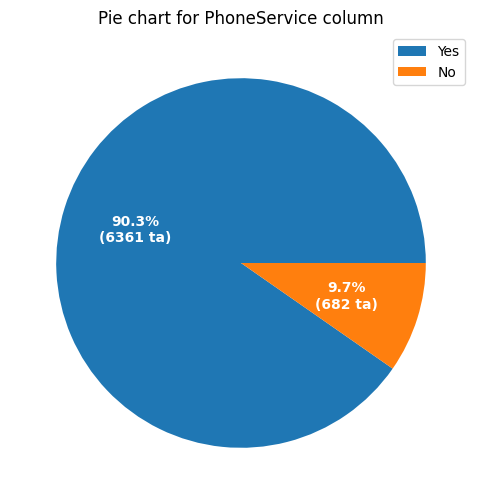

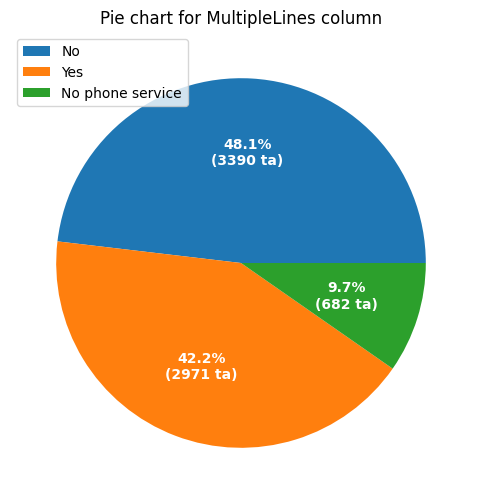

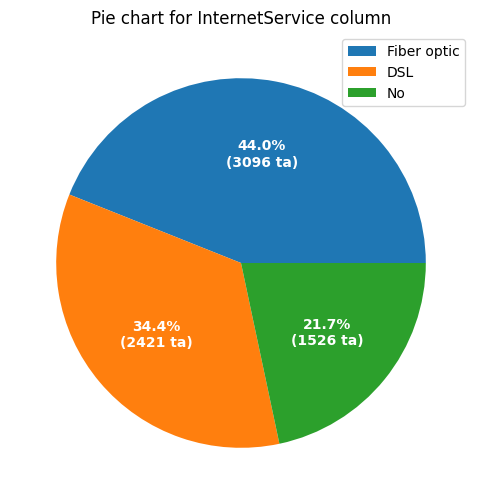

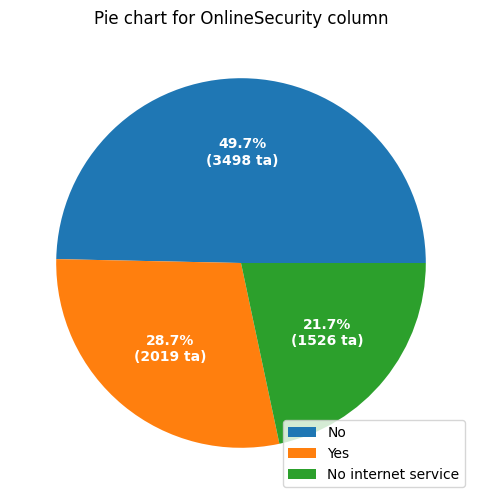

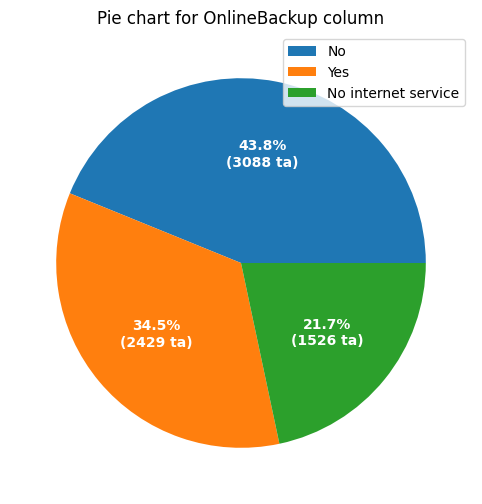

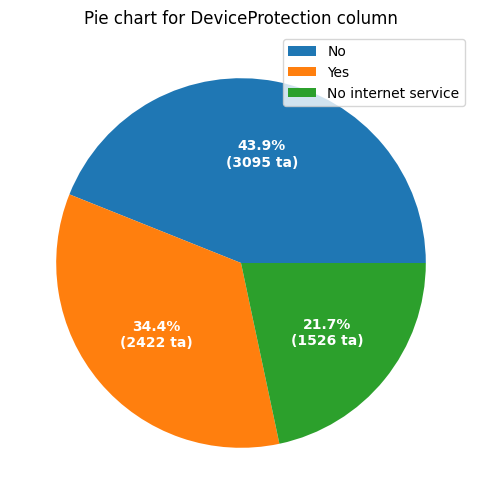

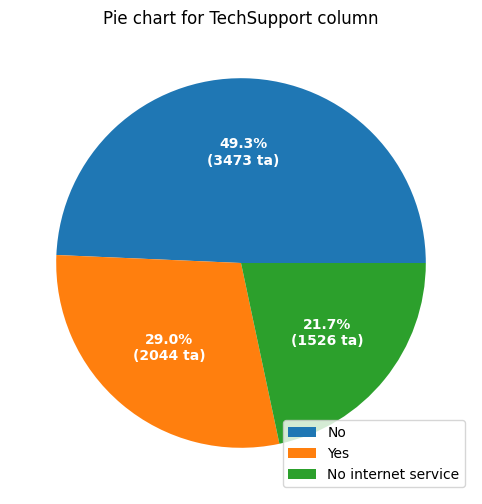

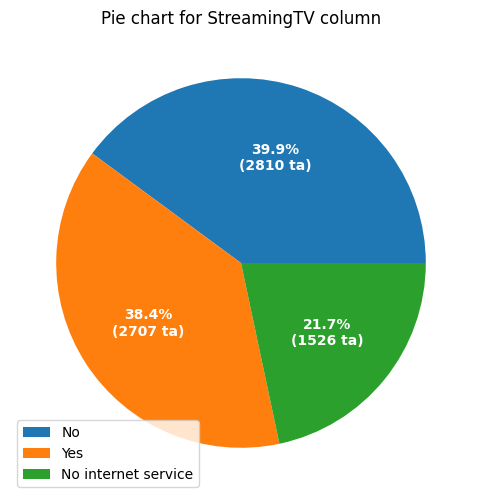

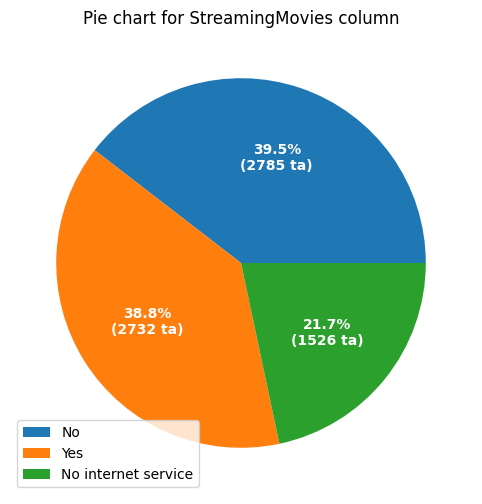

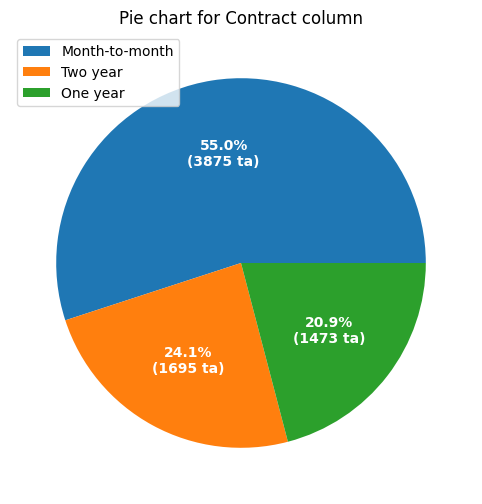

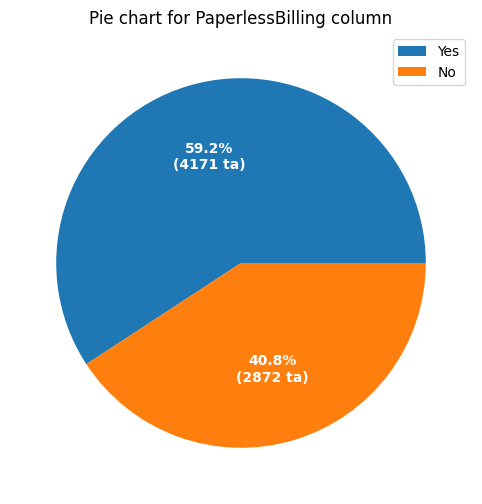

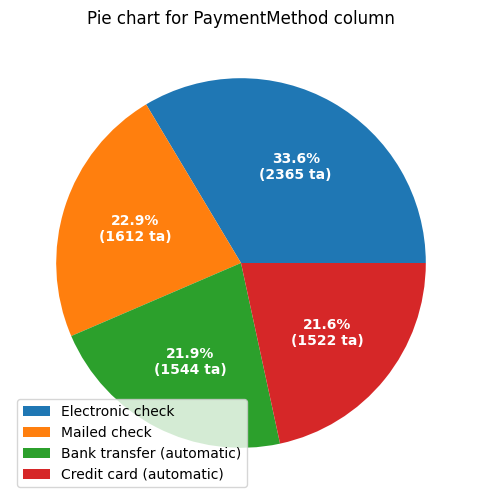

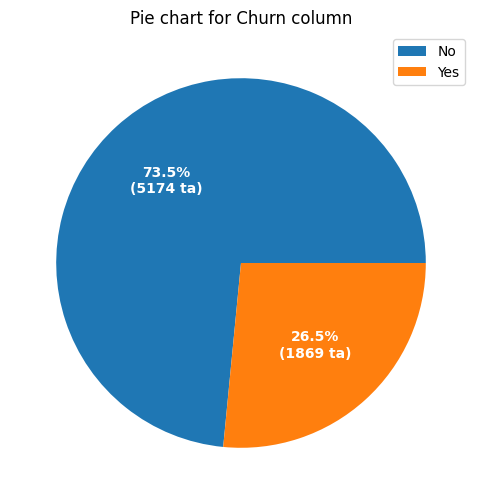

In [31]:
for i in obj_cols:
    data = df[i].value_counts()

    fig, ax = plt.subplots(figsize = (8,6), subplot_kw=dict(aspect='equal'))
    
    def func(pct, allvals):
        absolute = int(np.round(pct / 100. * np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute} ta)"

        
    wedges, texts, autotexts = ax.pie(data.values, autopct=lambda pct: func(pct, data.values), textprops=dict(color = 'w'))
    
    ax.legend(wedges, data.index, loc=0)
    plt.setp(autotexts, size = 10, weight = 'bold')
    plt.title(f"Pie chart for {i} column")
    plt.show()

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
lists = [0, 12, 24, 36, 48, 60, 72]

tenure = pd.cut(df['tenure'], lists)
tenure

0        (0, 12]
1       (24, 36]
2        (0, 12]
3       (36, 48]
4        (0, 12]
          ...   
7038    (12, 24]
7039    (60, 72]
7040     (0, 12]
7041     (0, 12]
7042    (60, 72]
Name: tenure, Length: 7021, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60] < (60, 72]]

In [40]:
churn_tenure = pd.DataFrame(tenure)

In [ ]:
churn_tenure['churn'] = df["Churn"]
churn_tenure

,tenure,churn
0,"(0, 12]",No
1,"(24, 36]",No
2,"(0, 12]",Yes
3,"(36, 48]",No
4,"(0, 12]",Yes
...,...,...
7038,"(12, 24]",No
7039,"(60, 72]",No
7040,"(0, 12]",No
7041,"(0, 12]",Yes


/tmp/ipykernel_27876/2264980089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = churn_tenure.groupby('tenure').value_counts().unstack()


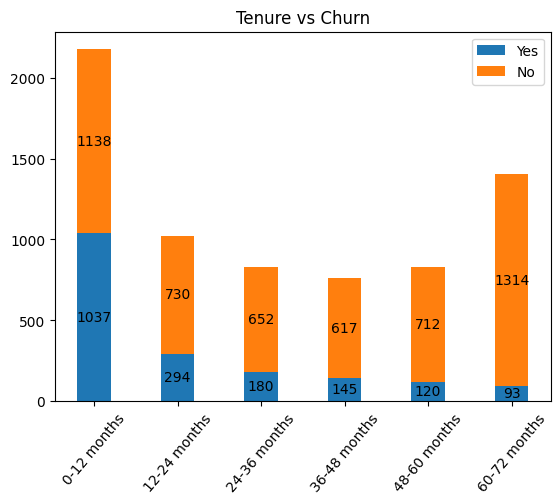

In [85]:
grouped = churn_tenure.groupby('tenure').value_counts().unstack()
grouped.columns.name = None

group1 = [i.left for i in grouped.index]
group2 = [i.right for i in grouped.index]
group = [f'{a}-{b} months' for a, b in zip(group1, group2)]
answer_counts = {
    'Yes':[grouped.loc[interval, 'Yes'] for interval in grouped.index],
    'No': [grouped.loc[interval, 'No'] for interval in grouped.index]
}
width = 0.4  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(6)

for answer, counts in answer_counts.items():
    p = ax.bar(group, counts, width, label=answer, bottom=bottom)
    bottom += counts

    ax.bar_label(p, label_type='center')

ax.set_title('Tenure vs Churn')
ax.legend()
plt.xticks(rotation=50)

plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [87]:
df.duplicated().sum()

np.int64(22)

In [88]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [90]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [93]:
df["TotalCharges"] = df["TotalCharges"].ffill()
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

str_cols = df.select_dtypes(include = 'object').columns
df[str_cols]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [99]:
df.replace(["No", 'Yes'], [0, 1])

/tmp/ipykernel_27876/3632851156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["No", 'Yes'], [0, 1])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [220]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ['SeniorCitizen',	'Partner',	'Dependents', 'PhoneService',]
def encoder(data):
    df=pd.get_dummies(data, columns=['gender'])
    print(df)
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return [df, df.select_dtypes(include = 'object').columns]

def uniques(df, columns):
    for col in columns:
        uniques_v = df[col].unique()
        values = []
        i = 2
        for u in uniques_v:
            if u == "Yes":
                values.append(1)
            elif u == 'No':
                values.append(0)
            else:
                values.append(i)
                i+=1
        print(values)   
        df[col] = df[col].replace(uniques_v, values)
    return pd.DataFrame(df)

df_t = uniques(encoder(df)[0], encoder(df)[1])   

KeyError: "None of [Index(['gender'], dtype='object')] are in the [columns]"

In [147]:
df_t
    

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,29.85,29.85,0,True,False
1,0,0,0,34,1,1,0,1,1,1,...,0,0,1,1,1,56.95,1889.50,0,False,True
2,0,0,0,2,1,1,0,1,0,0,...,0,0,0,0,1,53.85,108.15,1,False,True
3,0,0,0,45,0,0,0,1,1,1,...,0,0,1,1,2,42.30,1840.75,0,False,True
4,0,0,0,2,1,1,1,0,1,0,...,0,0,0,0,0,70.70,151.65,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,1,1,1,...,1,1,1,0,1,84.80,1990.50,0,False,True
7039,0,1,1,72,1,2,1,0,0,1,...,1,1,1,0,3,103.20,7362.90,0,True,False
7040,0,1,1,11,0,0,0,1,1,0,...,0,0,0,0,0,29.60,346.45,0,True,False
7041,1,1,0,4,1,2,1,0,1,0,...,0,0,0,0,1,74.40,306.60,1,False,True


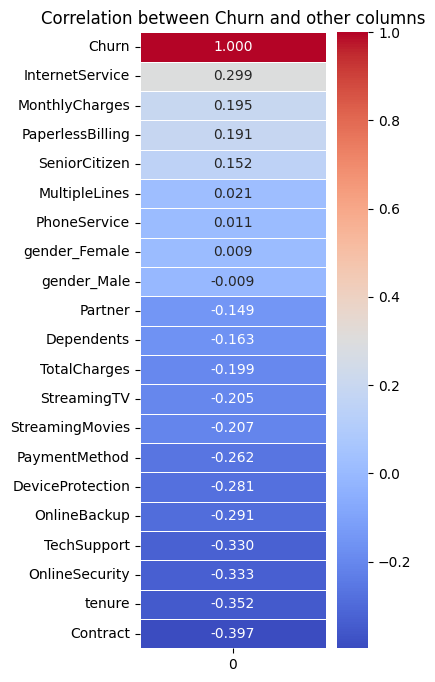

In [164]:
df_churn_corr = pd.DataFrame(df_t.corrwith(df_t['Churn'], numeric_only=True).sort_values(ascending=False))
plt.figure(figsize = (3, 8))
sns.heatmap(df_churn_corr, annot=True, cmap="coolwarm", fmt='.3f', linewidths=0.5, linecolor="white")
plt.title('Correlation between Churn and other columns')
plt.show()

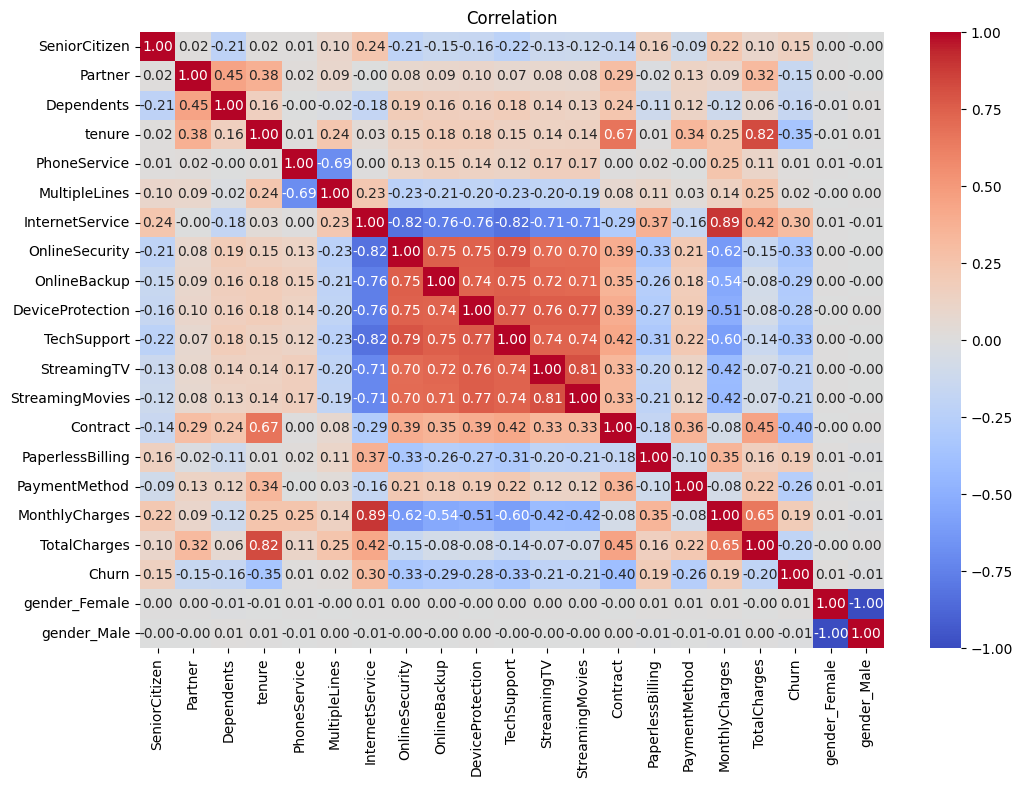

In [155]:
plt.figure(figsize=(12,8))
sns.heatmap(df_t.corr(), annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Correlation")
plt.show()


In [175]:
df=df_t
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1,0,1,0,2,2,0,1,0,...,0,0,2,1,2,29.85,29.85,0,True,False
1,0,0,0,34,1,0,2,1,0,1,...,0,0,3,0,3,56.95,1889.50,0,False,True
2,0,0,0,2,1,0,2,1,1,0,...,0,0,2,1,3,53.85,108.15,1,False,True
3,0,0,0,45,0,2,2,1,0,1,...,0,0,3,0,4,42.30,1840.75,0,False,True
4,0,0,0,2,1,0,3,0,0,0,...,0,0,2,1,2,70.70,151.65,1,True,False


In [176]:
for idx, val in zip(df_churn_corr.index, df_churn_corr.values):
    if val<0.1 and val>-0.1:
        df = df.drop(columns=idx, axis=1)
        print(idx)

df.head()

MultipleLines
PhoneService
gender_Female
gender_Male


,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,2,0,1,0,0,0,0,2,1,2,29.85,29.85,0
1,0,0,0,34,2,1,0,1,0,0,0,3,0,3,56.95,1889.50,0
2,0,0,0,2,2,1,1,0,0,0,0,2,1,3,53.85,108.15,1
3,0,0,0,45,2,1,0,1,1,0,0,3,0,4,42.30,1840.75,0
4,0,0,0,2,3,0,0,0,0,0,0,2,1,2,70.70,151.65,1


In [174]:
df.corrwith(df['Churn'])

SeniorCitizen       0.151619
Partner            -0.149135
Dependents         -0.163459
tenure             -0.351508
InternetService     0.298790
OnlineSecurity     -0.333144
OnlineBackup       -0.291349
DeviceProtection   -0.281312
TechSupport        -0.330149
StreamingTV        -0.205022
StreamingMovies    -0.206533
Contract           -0.396531
PaperlessBilling    0.190891
PaymentMethod      -0.261892
MonthlyCharges      0.194508
TotalCharges       -0.198576
Churn               1.000000
dtype: float64

In [178]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [217]:
class Train_models:
    def __init__(self, X, y, test_size=0.2, cv=5, random_state=42):
        self.X = X
        self.y = y
        self.test_size = test_size
        self.cv = cv
        self.random_state = random_state
        self.result = {}
        self.trained_models = {}
        
        self.models = {
            'DecisionTreeClassifier':DecisionTreeClassifier(random_state=random_state),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
        }
        
    def run(self, scale = True):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        
        for name, model in self.models.items():
            
            if scale:
                pipeline = make_pipeline(StandardScaler(), model)
            else:
                pipeline = model
                
            pipeline.fit(X_train, y_train)
            self.trained_models[name] = pipeline
            
            y_pred = pipeline.predict(X_test)
            y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None
          
            
            self.result[name] = {
                'accuracy_score': accuracy_score(y_test, y_pred),
                'f1_score': f1_score(y_test, y_pred),
                'roc_auc_score':roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
            }
        
        self.result_df = pd.DataFrame(self.result).T.sort_values('roc_auc_score', ascending=False)
        
        return self.result_df
    
    def get_model(self, name):
        
        return self.trained_models.get(name)
    
    def best_model(self, metrics = 'roc_auc_score'):
        if not hasattr(self, 'result_df'):
            raise ValueError('You call .run() function first!!!')
        best_model_name = self.result_df[metrics].idxmax()
        return best_model_name, self.trained_models[best_model_name]

In [218]:
train = Train_models(X, y)

In [219]:
train.run()

,accuracy_score,f1_score,roc_auc_score
GradientBoostingClassifier,0.796441,0.557276,0.839996
RandomForestClassifier,0.785765,0.533333,0.820213
DecisionTreeClassifier,0.710320,0.433936,0.622008
